```
💡Integrantes💡

✨Laura Sofía Ortiz Arcos
✨David Santiago Flórez Alsina
```


In [41]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt

from sklearn.model_selection  import train_test_split
from sklearn.neighbors        import KNeighborsClassifier
from sklearn.tree             import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn                  import metrics
from sklearn.linear_model     import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics          import mean_squared_error
from sklearn.linear_model     import LinearRegression 
from sklearn.neighbors        import KNeighborsClassifier
from sklearn                  import decomposition, datasets
from sklearn                  import tree
from sklearn.pipeline         import Pipeline
from sklearn                  import neighbors
from sklearn.preprocessing    import StandardScaler
from sklearn.model_selection  import GridSearchCV
from sklearn.neighbors        import KNeighborsRegressor

**1. Cargar el dataset HousingData, el cual se proveerá junto con un diccionario de los atributos. La variable objetivo es MEDV.**

In [42]:
# Leemos el dataset, ya que es un .txt tenemos que poner como está separado para poder leerlo
df = pd.read_csv('HousingData1.txt', sep=",")
df.head(5)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,NaN,36.2


**2. Examinar y realizar una breve descripción de los tipos de variable o cualquier observación que considere pertinente. Remueva filas con valores ausentes si en algún punto lo considera necesario.**

_Note que todas las variables son numéricas._

In [43]:
# Removemos las filas con valores NaN. 
df = df.dropna()
df.head(5)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7


In [44]:
df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,250.167513,3.690136,11.460660,11.000863,0.068528,0.553215,6.280015,68.932741,3.805268,9.403553,406.431472,18.537563,12.769112,22.359645
std,148.767805,9.202423,23.954082,6.908364,0.252971,0.113112,0.697985,27.888705,2.098571,8.633451,168.312419,2.166460,7.308430,9.142979
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,114.750000,0.081955,0.000000,5.130000,0.000000,0.453000,5.879250,45.475000,2.110100,4.000000,280.250000,17.400000,7.125000,16.800000
50%,252.500000,0.268880,0.000000,8.560000,0.000000,0.538000,6.201500,77.700000,3.199200,5.000000,330.000000,19.100000,11.300000,21.050000
75%,378.750000,3.435973,12.500000,18.100000,0.000000,0.624000,6.605500,94.250000,5.116700,24.000000,666.000000,20.200000,17.117500,25.000000
max,504.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


**3. Separe el conjunto de datos en atributos X y variable objetivo y. Luego separe éstos en conjuntos de entrenamiento y testeo, con una proporción de 75-25.**

In [45]:
# Separamos el conjunto de datos en atributos X y variable objetivo y. 
X = df.drop('MEDV', axis=1)
y = df['MEDV']

# Separamos éstos en conjuntos de train y test, con una proporción de 75-25.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, train_size=0.75, random_state=0, shuffle=True)

**4. Entrene un modelo de regresión lineal usando el conjunto de entrenamiento. Determine su coeficiente de determinación (R2 o, en el caso de SKLearn el score). Extraiga los coeficientes o parámetros predichos por el modelo usando el atributo coef_.**

In [46]:
regresion = LinearRegression()
regresion.fit(X_train, y_train)

# Hacemos predicciones en el conjunto de prueba y calculamos
# el coeficiente de determinación (R²)
r2 = regresion.score(X_test, y_test)
print('Coeficiente de determinación es: ', r2)

# Extraemos los coeficientes o parámetros predichos por el modelo
coef = regresion.coef_
coefs = []
print('Coeficientes: ', pd.Series(coef, index = X.columns)) 


Coeficiente de determinación es:  0.6492426739578858
Coeficientes:  Unnamed: 0    -0.002406
CRIM          -0.090417
ZN             0.043268
INDUS          0.056321
CHAS           2.958271
NOX          -22.318312
RM             4.707874
AGE           -0.021413
DIS           -1.524308
RAD            0.246751
TAX           -0.012181
PTRATIO       -0.951811
LSTAT         -0.382522
dtype: float64


**5. Mencione cuáles atributos obtuvieron un coeficiente con mayor magnitud. Éstos son los que más afectan a la variable objetivo.**

Los atributos que obtuvieron un coeficiente con mayor magnitud fueron:

- NOX         -> X[5]
- RM           -> X[6]
- CHAS      -> X[4]
- PTRATIO -> X[11]
Son los que afectan más a la variable objetivo.


In [48]:
# ahora extraemos los coeficientes predichos por el modelo
print('Coeficientes:\n ', pd.Series(coef, index = X.columns).sort_values()) 

Coeficientes:
  NOX          -22.318312
DIS           -1.524308
PTRATIO       -0.951811
LSTAT         -0.382522
CRIM          -0.090417
AGE           -0.021413
TAX           -0.012181
Unnamed: 0    -0.002406
ZN             0.043268
INDUS          0.056321
RAD            0.246751
CHAS           2.958271
RM             4.707874
dtype: float64


**6. Cree una lista de valores para el parámetro alpha en los algoritmos de regularización. Usando la validación cruzada de Ridge, busque un valor óptimo para le parámetro $\alpha$.**

In [54]:
lambdas = 10**np.linspace(start = -2, stop = 10, num= 100)

# validación cruzada de Ridge (RidgeCV)
ridgecv = RidgeCV(alphas=lambdas).fit(X_train, y_train)

y_pred = ridgecv.predict(X_test)

print("R²: ", ridgecv.score(X_test, y_test))
print("RSE: ", mean_squared_error(y_test, y_pred))     

R²:  0.6497956041119761
RSE:  25.0703669756565


**7. Realice una regresión de Ridge usando el parámetro $\alpha$ hallado en el punto anterior.**

In [51]:
ridge  = Ridge(alpha = ridgecv.alpha_)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

score_ridge = ridge.score(X_test, y_test)
rse_ridge = mean_squared_error(y_test, y_pred)

print("R²: ", score_ridge)
print("RSE: ", rse_ridge)     

R²:  0.6497955685852554
RSE:  25.070369518936744


**8. Repita los dos puntos anteriores para regresión de Lasso.**

In [52]:
lassocv = LassoCV(alphas = lambdas)
lassocv.fit(X_train, y_train)

alphita = lassocv.alpha_
alphita

0.01

In [53]:
lasso = Lasso(alpha = alphita)
lasso.fit(X_train, y_train)                
pred  = lasso.predict(X_test)  

score_lasso = lasso.score(X_test, y_test)
rse_lasso = mean_squared_error(y_test, pred)

print("R²: ", score_lasso)
print("RSE =", rse_lasso)   

R²:  0.6536297295039765
RSE = 24.795890322202762


**9. ¿Aplicar regresión de Ridge y Lasso mejoró el score de ésta regresion?**

_Sí, mejoró el score muy ligeramente, sin embargo hubo mejora._

**10. Aplique árboles de decisión de regresión para predecir la variable objetivo con distintos valores de los parámetros max leaf nodes y max depth. Quédese con el modelo que dé un mayor score.**

In [38]:
pipeline = Pipeline([("scaler" , StandardScaler()),
                     ("rf",DecisionTreeRegressor())])

param_grid = {
    'rf__max_depth': [1,2,3,4,5,6,7,8,9,10],
    'rf__max_leaf_nodes': [2,3,4,5,6,7,8,9,10,11,12]
}
# initialize
grid_pipeline = GridSearchCV(pipeline, param_grid, n_jobs=2)

# fit
grid_pipeline.fit(X_train,y_train)
grid_pipeline.best_params_

{'rf__max_depth': 6, 'rf__max_leaf_nodes': 12}

In [39]:
regressor = DecisionTreeRegressor(max_depth = 6, max_leaf_nodes = 12)
regressor.fit(X_train, y_train)

y_pred  = regressor.predict(X_test) 
rse_tree = mean_squared_error(y_test, y_pred)


score_tree = regressor.score(X_train, y_train)
print("R²:", score_tree) 
print("RSE =", rse_tree)   

R²: 0.9090632466039296
RSE = 11.994791345806387


**11. Grafique el árbol con el cuál obtuvo un mayor score. Describa el modelo que define este árbol. ¿Qué atributos son los más importantes para éste modelo? Compare esta lista de atributos con los obtenidos en el ı́tem quinto.¿Se utilizan todos los atributos en éste modelo? Si no, ¿cuáles no utiliza?**

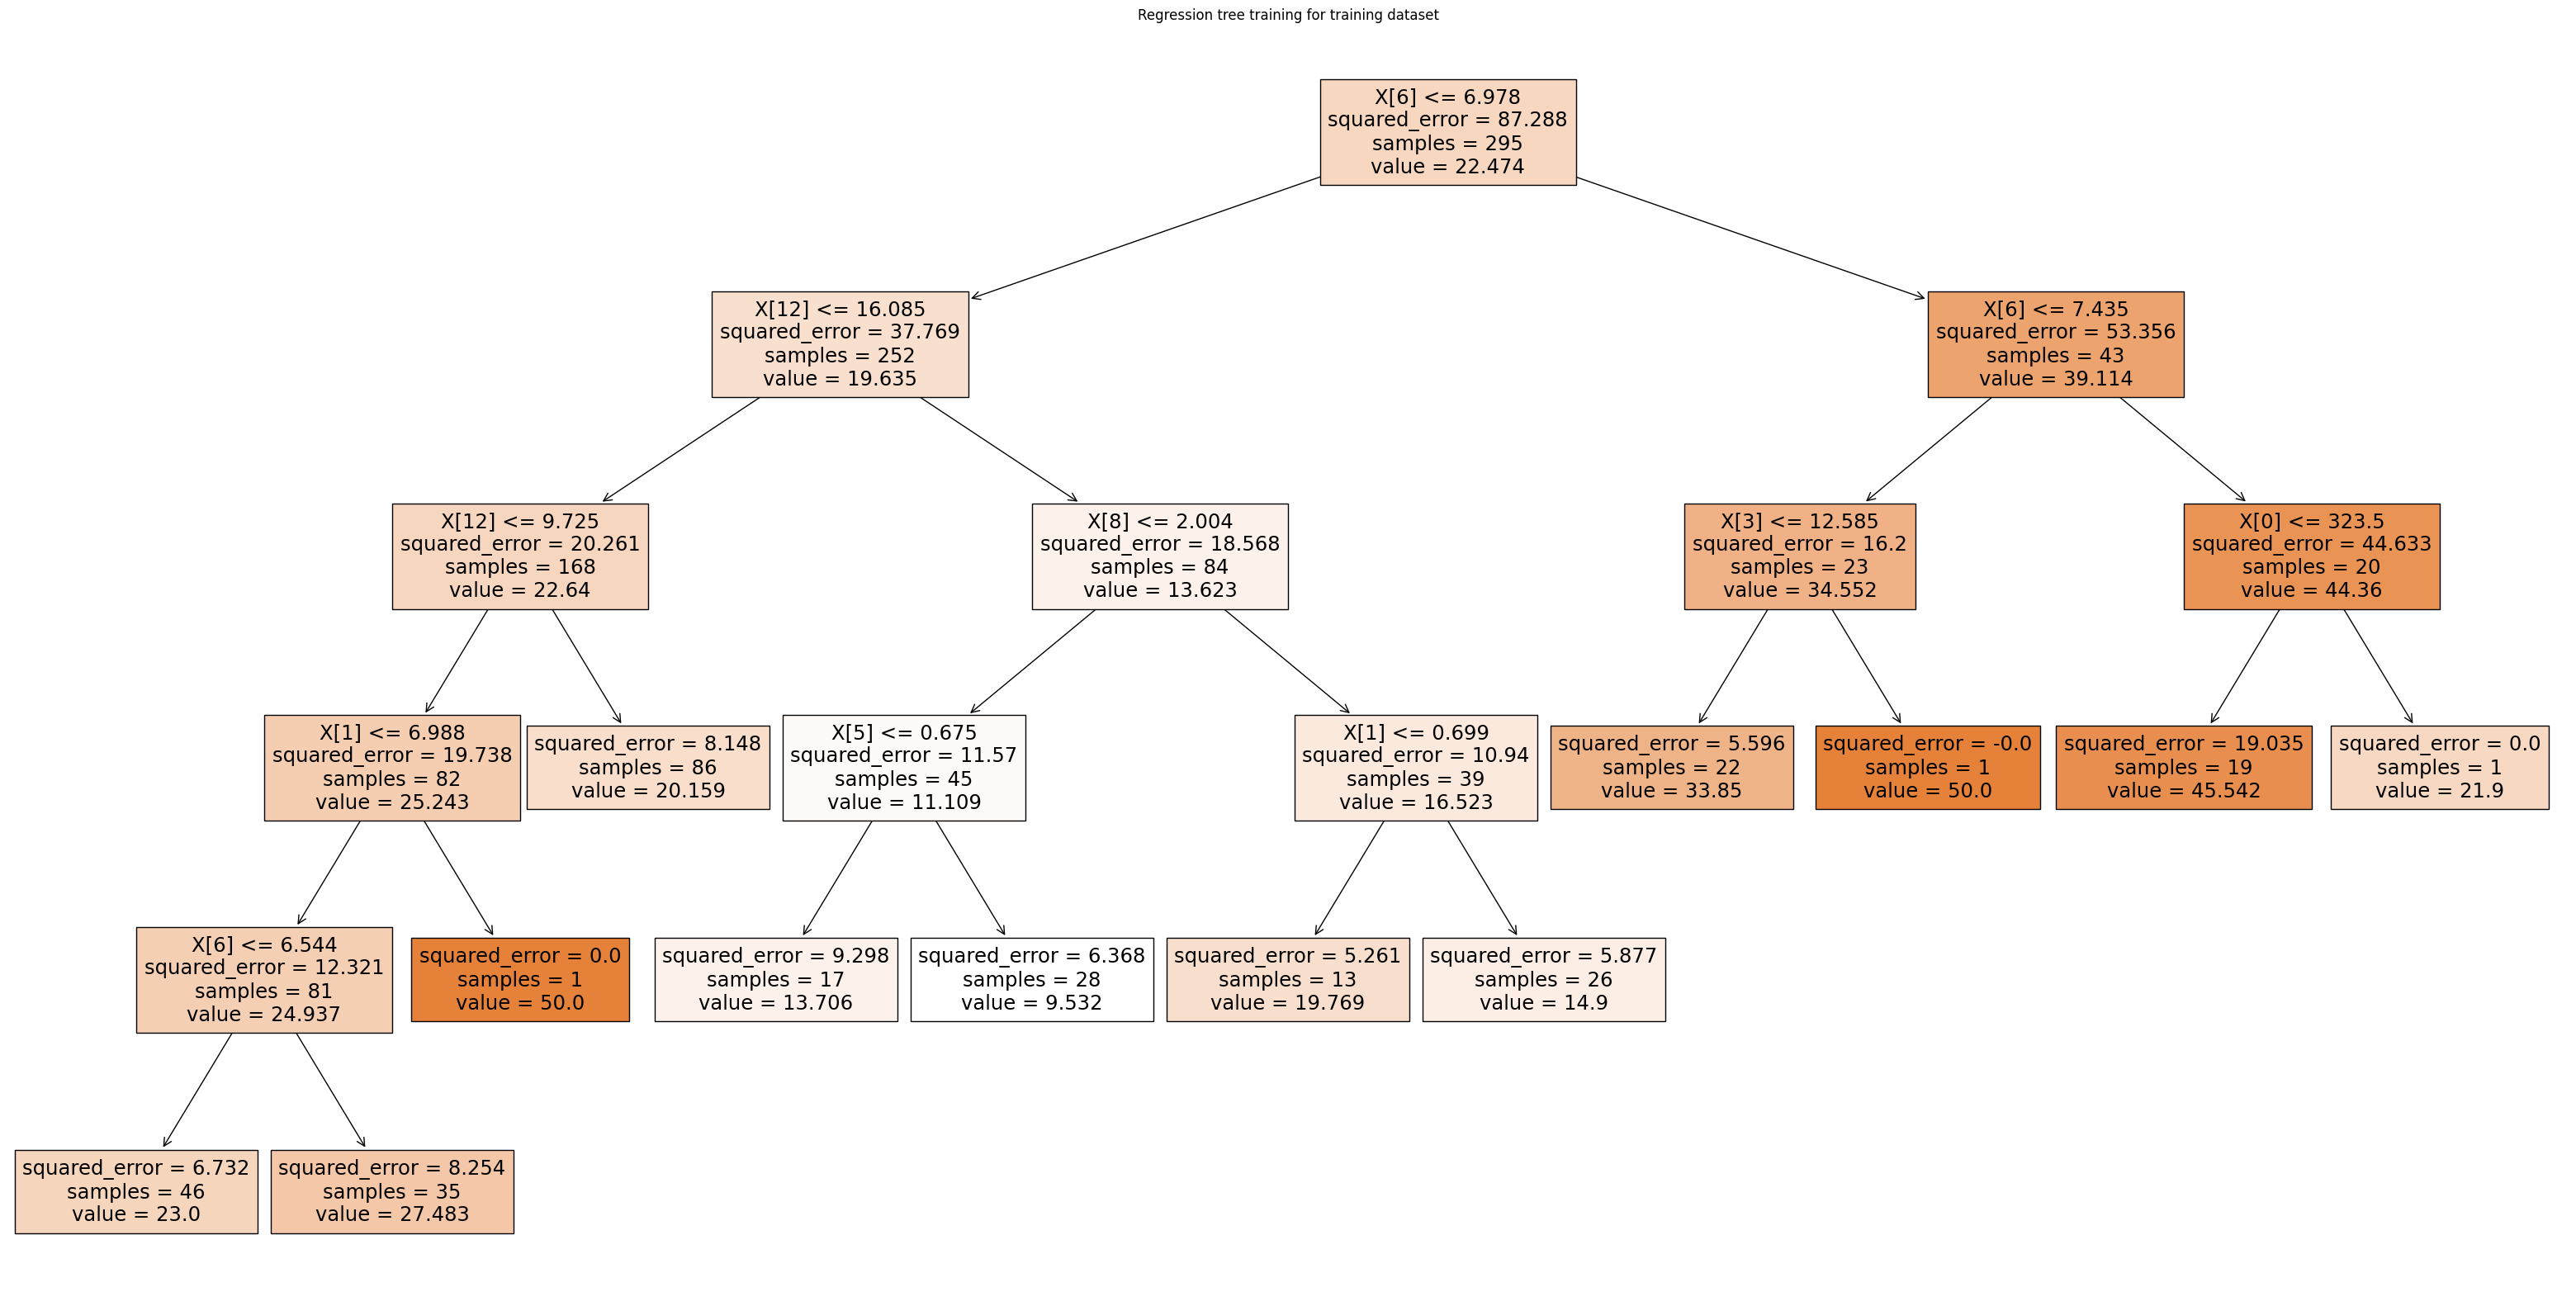

In [40]:
## Graficar el árbol

plt.figure(figsize=(40,20))
plot_tree(regressor, filled=True, class_names=True)
plt.title("Regression tree training for training dataset")
plt.show()


```
💡⚠️ Note que al correr GridSearch, los óptimos pueden cambiar bastante, sin embargo siguen siendo óptimos.
Los resultados que mostraremos acontinuación son para cuando los parámetros óptimos nos dieron:

- profundidad de 8
- cantidad máxima de hojas de 8
```

En su momento los atributos más importantes fueron, en este orden (según Ridge):
- NOX         -> X[5]
- RM           -> X[6]
- CHAS      -> X[4]
- PTRATIO -> X[11]
Ahora note que las variables utilizadas por el **árbol** fueron:

- RM        ->  X[6]
- LSTAT   ->  X[12]
- DIS        ->  X[8]
- RAD       ->  X[9]
- CRIM     ->  X[1]
- NOX      ->  X[5]

Note entonces que el árbol usa muchas menos variables que el modelo de regresión Ridge, y le da menos peso a las variables CHAS y PTRATIO, que eran significativas en Ridge. ***En concreto el árbol usa 5 variables menos que Ridge.*** _Descartó:_

- CHAS      -> X[4]
- PTRATIO -> X[11]
- ZN          -> X[2]
- INDUS    -> X[3]
- AGE        -> X[7]

**12. Ahora aplicaremos el método de vecinos más cercanos para regresión. Utilize el KNeighbors regressor de SKLearn para predecir nuestra variable objetivo usando diferentes valores del pará el parámetro k. Quédese con el mejor parámetro y mencione su score.**

In [15]:
k_values = [(2*n + 1) for n in range(0, 130)]

# inicializar variables para el modelo con el score máximo
max_score_kn = -np.inf
rse_kn = -np.inf
best_regressor = None

# iterar sobre todos los valores de k
for k in k_values:
    # crear un modelo de vecinos más cercanos con el valor actual de k
    regressor = KNeighborsRegressor(n_neighbors=k)
    
    # ajustar el modelo a los datos de entrenamiento
    regressor.fit(X_train, y_train)
    
    # hacer predicciones en el conjunto de prueba y calcular el coeficiente de determinación 
    y_pred = regressor.predict(X_test)
    score = regressor.score(X_test, y_test) 
    rse_kn = mean_squared_error(y_test, y_pred)
    
    # si el score es mayor que el score máximo anterior, actualizar las variables del modelo 
    # con el nuevo modelo
    if score > max_score_kn:
        max_score_kn = score
        best_regressor = regressor

# imprimir el score máximo 
print('Score máximo:', max_score_kn)
print('RSE: ', rse_kn)

Score máximo: 0.747032447885513
RSE:  69.62700736889926


**13. Finalmente, compare los resultados obtenidos con los distintos métodos. ¿Cuál tuvo un mejor desempeño? ¿Cuál tuvo un peor desemempeño? Mencione cualquier otra conclusión que extraiga de estos resultados o de los datos, por ejemplo: ¿por qué podrı́a haberse comportado mejor un modelo que otro?**

In [16]:
print("R²: ", score_ridge)
print("RSE: ", rse_ridge, '\n')

print("R²: ", score_lasso)
print("RSE =", rse_lasso, '\n') 

print("R²:", score_tree) 
print("RSE =", rse_tree, '\n') 

print('R²:', max_score_kn)
print('RSE= ', rse_kn)

R²:  0.6497955685852554
RSE:  25.070369518936744 

R²:  0.6536297295039765
RSE = 24.795890322202762 

R²: 0.9148372961897472
RSE = 11.4962669464574 

R²: 0.747032447885513
RSE=  69.62700736889926


Como podemos ver el mejor desempeño fue logrado por el arbol de regresión, y el de peor desempeño fue la regresión ridge. Parece que por la naturaleza de los datos vemos que tratar de ajustarlos con un modelo lineal es una muy mala idea. Por lo tanto los árboles de decisión de regresión fueron mejores.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=40d35e2e-6794-447e-b1bd-d07209354f7d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>